In [25]:
import pandas as pd

In [26]:
pit_stops_df = pd.read_csv("data/pit_stops.csv")
races_df = pd.read_csv("data/races.csv")
results_df = pd.read_csv("data/results.csv")
constructors_df = pd.read_csv("data/constructors.csv")


In [27]:
# Replace this with your actual data import method

# Create a DataFrame for pit stops with 'stop' equal to 2
pit_stop_2_df = pit_stops_df[pit_stops_df['stop'] == 2]

# Rename columns in the pit_stop_2_df to avoid conflicts when merging
pit_stop_2_df = pit_stop_2_df.rename(columns={
    'lap': 'pit_stop_2_lap',
    'time': 'pit_stop_2_time',
    'duration': 'pit_stop_2_duration',
    'milliseconds': 'pit_stop_2_milliseconds'
}) 

# Merge the pit_stop_2_df with the original DataFrame using raceId and driverId
merged_df = pit_stops_df.merge(pit_stop_2_df[['raceId', 'driverId', 'pit_stop_2_lap', 'pit_stop_2_time', 'pit_stop_2_duration', 'pit_stop_2_milliseconds']], on=['raceId', 'driverId'], how='left')

# Fill NaN values with appropriate values (0 in this case)
merged_df = merged_df.fillna(0)

# Drop the duplicate rows with the same raceId and driverId
merged_df = merged_df.drop_duplicates(subset=['raceId', 'driverId'])

# Reset index if needed
merged_df = merged_df.reset_index(drop=True)

# Print the resulting DataFrame
print(merged_df)

      raceId  driverId  stop  lap      time duration  milliseconds   
0        841       153     1    1  17:05:23   26.898         26898  \
1        841        30     1    1  17:05:52   25.021         25021   
2        841        17     1   11  17:20:48   23.426         23426   
3        841         4     1   12  17:22:34   23.251         23251   
4        841        13     1   13  17:24:10   23.842         23842   
...      ...       ...   ...  ...       ...      ...           ...   
4696    1096       830     1   20  17:33:31   22.735         22735   
4697    1096       844     1   21  17:35:10   22.210         22210   
4698    1096        20     1   25  17:41:51   23.186         23186   
4699    1096       825     1   28  17:46:53   22.387         22387   
4700    1096       822     1   30  17:49:54   22.573         22573   

      pit_stop_2_lap pit_stop_2_time pit_stop_2_duration   
0               17.0        17:31:06              24.463  \
1               17.0        17:32:08   

In [28]:
# Define a list of stop values to consider
stop_values = [1, 2, 3, 4, 5, 6]

# Create an empty DataFrame to store the merged data
merged_df = pit_stops_df.copy()

# Iterate through stop values and merge the corresponding DataFrames
for stop_value in stop_values:
    # Filter the DataFrame for the current stop value
    pit_stop_df = pit_stops_df[pit_stops_df['stop'] == stop_value]
    
    # Rename columns to avoid conflicts when merging
    pit_stop_df = pit_stop_df.rename(columns={
        'lap': f'pit_stop_{stop_value}_lap',
        'time': f'pit_stop_{stop_value}_time',
        'duration': f'pit_stop_{stop_value}_duration',
        'milliseconds': f'pit_stop_{stop_value}_milliseconds'
    })

    # Merge the current pit stop data with the merged DataFrame
    merged_df = merged_df.merge(pit_stop_df[['raceId', 'driverId', f'pit_stop_{stop_value}_lap', f'pit_stop_{stop_value}_time', f'pit_stop_{stop_value}_duration', f'pit_stop_{stop_value}_milliseconds']], on=['raceId', 'driverId'], how='left')

# Fill NaN values with appropriate values (0 in this case)
merged_df = merged_df.fillna(0)

# Drop the duplicate rows with the same raceId and driverId
merged_df = merged_df.drop_duplicates(subset=['raceId', 'driverId'])

# Reset index if needed
merged_df = merged_df.reset_index(drop=True)

# Print the resulting DataFrame
print(merged_df)


      raceId  driverId  stop  lap      time duration  milliseconds   
0        841       153     1    1  17:05:23   26.898         26898  \
1        841        30     1    1  17:05:52   25.021         25021   
2        841        17     1   11  17:20:48   23.426         23426   
3        841         4     1   12  17:22:34   23.251         23251   
4        841        13     1   13  17:24:10   23.842         23842   
...      ...       ...   ...  ...       ...      ...           ...   
4696    1096       830     1   20  17:33:31   22.735         22735   
4697    1096       844     1   21  17:35:10   22.210         22210   
4698    1096        20     1   25  17:41:51   23.186         23186   
4699    1096       825     1   28  17:46:53   22.387         22387   
4700    1096       822     1   30  17:49:54   22.573         22573   

      pit_stop_1_lap pit_stop_1_time pit_stop_1_duration  ...   
0                1.0        17:05:23              26.898  ...  \
1                1.0        1

In [29]:
merged_df.head(20)

,raceId,driverId,stop,lap,time,duration,milliseconds,pit_stop_1_lap,pit_stop_1_time,pit_stop_1_duration,...,pit_stop_4_duration,pit_stop_4_milliseconds,pit_stop_5_lap,pit_stop_5_time,pit_stop_5_duration,pit_stop_5_milliseconds,pit_stop_6_lap,pit_stop_6_time,pit_stop_6_duration,pit_stop_6_milliseconds
0,841,153,1,1,17:05:23,26.898,26898,1.0,17:05:23,26.898,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
1,841,30,1,1,17:05:52,25.021,25021,1.0,17:05:52,25.021,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
2,841,17,1,11,17:20:48,23.426,23426,11.0,17:20:48,23.426,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
3,841,4,1,12,17:22:34,23.251,23251,12.0,17:22:34,23.251,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
4,841,13,1,13,17:24:10,23.842,23842,13.0,17:24:10,23.842,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
5,841,22,1,13,17:24:29,23.643,23643,13.0,17:24:29,23.643,...,26.309,26309.0,0.0,0,0,0.0,0.0,0,0,0.0
6,841,20,1,14,17:25:17,22.603,22603,14.0,17:25:17,22.603,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
7,841,814,1,14,17:26:03,24.863,24863,14.0,17:26:03,24.863,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
8,841,816,1,14,17:26:50,25.259,25259,14.0,17:26:50,25.259,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
9,841,67,1,15,17:27:34,25.342,25342,15.0,17:27:34,25.342,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   4701 non-null   int64  
 1   driverId                 4701 non-null   int64  
 2   stop                     4701 non-null   int64  
 3   lap                      4701 non-null   int64  
 4   time                     4701 non-null   object 
 5   duration                 4701 non-null   object 
 6   milliseconds             4701 non-null   int64  
 7   pit_stop_1_lap           4701 non-null   float64
 8   pit_stop_1_time          4701 non-null   object 
 9   pit_stop_1_duration      4701 non-null   object 
 10  pit_stop_1_milliseconds  4701 non-null   float64
 11  pit_stop_2_lap           4701 non-null   float64
 12  pit_stop_2_time          4701 non-null   object 
 13  pit_stop_2_duration      4701 non-null   object 
 14  pit_stop_2_milliseconds 

#### Races

To plot the average pitstop time per circuit, we still need the circuit name and the year.

Let's merge the __merged_df__ to the __races_df__ 

From the __races_df__ we need the follow columns : __name__ and __year__ based on __raceId__

In [31]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [32]:
# List of columns to drop
columns_to_drop = ['round', 'circuitId', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time']
# Drop the specified columns
races_df.drop(columns_to_drop, axis=1, inplace=True)

# Print the updated DataFrame
races_df.head()

,raceId,year,name
0,1,2009,Australian Grand Prix
1,2,2009,Malaysian Grand Prix
2,3,2009,Chinese Grand Prix
3,4,2009,Bahrain Grand Prix
4,5,2009,Spanish Grand Prix


In [33]:
 # Rename columns to avoid conflicts when merging
races_df = races_df.rename(columns={"name":"circuit_name"})

In [34]:
merged_pit_stops_races = pd.merge(merged_df,races_df, on= 'raceId')

In [35]:
merged_pit_stops_races.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,pit_stop_1_lap,pit_stop_1_time,pit_stop_1_duration,...,pit_stop_5_lap,pit_stop_5_time,pit_stop_5_duration,pit_stop_5_milliseconds,pit_stop_6_lap,pit_stop_6_time,pit_stop_6_duration,pit_stop_6_milliseconds,year,circuit_name
0,841,153,1,1,17:05:23,26.898,26898,1.0,17:05:23,26.898,...,0.0,0,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix
1,841,30,1,1,17:05:52,25.021,25021,1.0,17:05:52,25.021,...,0.0,0,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix
2,841,17,1,11,17:20:48,23.426,23426,11.0,17:20:48,23.426,...,0.0,0,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix
3,841,4,1,12,17:22:34,23.251,23251,12.0,17:22:34,23.251,...,0.0,0,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix
4,841,13,1,13,17:24:10,23.842,23842,13.0,17:24:10,23.842,...,0.0,0,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix


In [36]:
merged_pit_stops_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   4701 non-null   int64  
 1   driverId                 4701 non-null   int64  
 2   stop                     4701 non-null   int64  
 3   lap                      4701 non-null   int64  
 4   time                     4701 non-null   object 
 5   duration                 4701 non-null   object 
 6   milliseconds             4701 non-null   int64  
 7   pit_stop_1_lap           4701 non-null   float64
 8   pit_stop_1_time          4701 non-null   object 
 9   pit_stop_1_duration      4701 non-null   object 
 10  pit_stop_1_milliseconds  4701 non-null   float64
 11  pit_stop_2_lap           4701 non-null   float64
 12  pit_stop_2_time          4701 non-null   object 
 13  pit_stop_2_duration      4701 non-null   object 
 14  pit_stop_2_milliseconds 

#### Results

In [37]:
results_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

Let's drop all the columns we don't need:

In [38]:
# List of columns to drop
columns_to_drop = ['resultId', 'driverId','number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId']
# Drop the specified columns
results_df.drop(columns_to_drop, axis=1, inplace=True)

# Print the updated DataFrame
results_df.head()

,raceId,constructorId
0,18,1
1,18,2
2,18,3
3,18,4
4,18,1


Now, let's merge:

In [39]:
merged_pit_stops_races_results = pd.merge(merged_pit_stops_races,results_df, on= 'raceId')

#### Constructors

In [40]:
constructors_df.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

In [41]:
 # Rename columns to avoid conflicts when merging
constructors_df = constructors_df.rename(columns={"name":"constructor_name"})

And drop the columns we don't need:

In [42]:
# List of columns to drop
columns_to_drop = ['constructorRef', 'nationality', 'url']
# Drop the specified columns
constructors_df.drop(columns_to_drop, axis=1, inplace=True)

# Print the updated DataFrame
constructors_df.head()

,constructorId,constructor_name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


Now we can add the constructors dataframe and create our final dataframe

In [43]:
merged_pit_stops_final_df = pd.merge(merged_pit_stops_races_results,constructors_df, on= 'constructorId')

In [44]:
merged_pit_stops_final_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,pit_stop_1_lap,pit_stop_1_time,pit_stop_1_duration,...,pit_stop_5_duration,pit_stop_5_milliseconds,pit_stop_6_lap,pit_stop_6_time,pit_stop_6_duration,pit_stop_6_milliseconds,year,circuit_name,constructorId,constructor_name
0,841,153,1,1,17:05:23,26.898,26898,1.0,17:05:23,26.898,...,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix,9,Red Bull
1,841,153,1,1,17:05:23,26.898,26898,1.0,17:05:23,26.898,...,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix,9,Red Bull
2,841,30,1,1,17:05:52,25.021,25021,1.0,17:05:52,25.021,...,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix,9,Red Bull
3,841,30,1,1,17:05:52,25.021,25021,1.0,17:05:52,25.021,...,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix,9,Red Bull
4,841,17,1,11,17:20:48,23.426,23426,11.0,17:20:48,23.426,...,0,0.0,0.0,0,0,0.0,2011,Australian Grand Prix,9,Red Bull


In [45]:
merged_pit_stops_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99722 entries, 0 to 99721
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   99722 non-null  int64  
 1   driverId                 99722 non-null  int64  
 2   stop                     99722 non-null  int64  
 3   lap                      99722 non-null  int64  
 4   time                     99722 non-null  object 
 5   duration                 99722 non-null  object 
 6   milliseconds             99722 non-null  int64  
 7   pit_stop_1_lap           99722 non-null  float64
 8   pit_stop_1_time          99722 non-null  object 
 9   pit_stop_1_duration      99722 non-null  object 
 10  pit_stop_1_milliseconds  99722 non-null  float64
 11  pit_stop_2_lap           99722 non-null  float64
 12  pit_stop_2_time          99722 non-null  object 
 13  pit_stop_2_duration      99722 non-null  object 
 14  pit_stop_2_millisecond

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_pit_stops_final_df is your DataFrame
# Filter the DataFrame for the Aston Martin team and years 2021 and 2022
filtered_df = merged_pit_stops_final_df[(merged_pit_stops_final_df['constructor_name'] == 'Aston Martin') &
                                         (merged_pit_stops_final_df['year'].isin([2021, 2022]))]

# Group the data by circuit_name and calculate the mean pit stop duration
grouped_df = filtered_df.groupby('circuit_name')['pit_stop_1_duration'].mean().reset_index()

# Create a bar plot to visualize the pit stop duration for each circuit
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['circuit_name'], grouped_df['pit_stop_1_duration'])
plt.xlabel('Circuit Name')
plt.ylabel('Mean Pit Stop Duration (milliseconds)')
plt.title('Mean Pit Stop Duration for Aston Martin (2021-2022) by Circuit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


TypeError: Could not convert 22.12422.12421.15221.15221.59521.59522.46122.46121.67721.67721.38021.38022.28322.28321.44921.44922.21322.21321.47121.47122.28822.28822.33822.33822.45522.45521.22121.22121.24121.24121.66921.66921.30421.30422.13322.13321.79321.79321.81421.81421.89521.89521.59121.59122.27622.27621.85521.85521.36021.36024.24324.24322.23422.23422.43522.43522.42322.42321.93021.93021.27021.27021.74021.74021.89321.89322.73522.73522.21022.21023.18623.18622.38722.38722.57322.573 to numeric

/var/folders/g4/vm6jsw_s0hlcmn6jslrlcxm80000gp/T/ipykernel_73596/3791676227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pit_stop_1_duration'] = filtered_df['pit_stop_1_duration'].str.replace('[^\d.]', '', regex=True).astype(float)


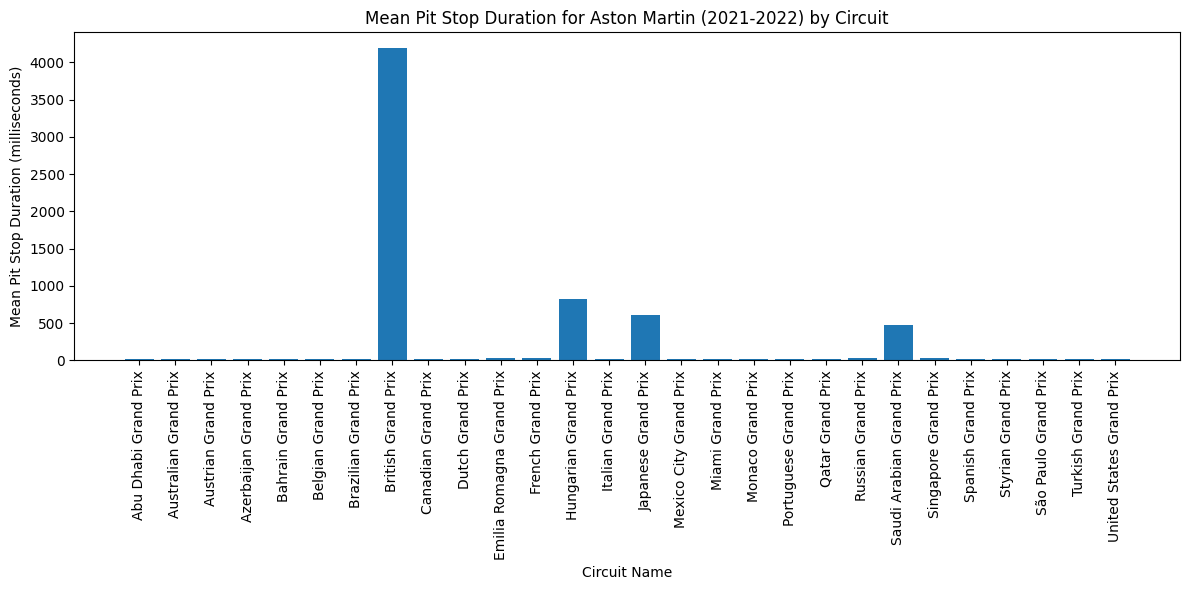

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_pit_stops_final_df is your DataFrame
# Filter the DataFrame for the Aston Martin team and years 2021 and 2022
filtered_df = merged_pit_stops_final_df[(merged_pit_stops_final_df['constructor_name'] == 'Aston Martin') &
                                         (merged_pit_stops_final_df['year'].isin([2021, 2022]))]

# Clean the pit_stop_1_duration column by removing non-numeric characters and converting to float
filtered_df['pit_stop_1_duration'] = filtered_df['pit_stop_1_duration'].str.replace('[^\d.]', '', regex=True).astype(float)

# Group the data by circuit_name and calculate the mean pit stop duration
grouped_df = filtered_df.groupby('circuit_name')['pit_stop_1_duration'].mean().reset_index()

# Create a bar plot to visualize the mean pit stop duration for each circuit
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['circuit_name'], grouped_df['pit_stop_1_duration'])
plt.xlabel('Circuit Name')
plt.ylabel('Mean Pit Stop Duration (milliseconds)')
plt.title('Mean Pit Stop Duration for Aston Martin (2021-2022) by Circuit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
